In [1]:
import time
import math
import random
from matplotlib import pyplot
%matplotlib inline
import numpy


<h2> Normal Distribution

In [2]:
num_trials = 1000000
random.seed(time.time())
array = numpy.ndarray(shape=(num_trials))


In [3]:
for i in range(0,num_trials):
    x1 = random.random()
    x2 = random.random()
    f1 = math.sqrt(-2*math.log(x1))*math.cos(2*math.pi*x2)
    f2 = math.sqrt(-2*math.log(x1))*math.sin(2*math.pi*x2)
    array[i] = f1
    

In [4]:
bins = list(range(-5,7))
for i in range(0,len(bins)):
    bins[i] = bins[i] - 0.5

print(bins)

[-5.5, -4.5, -3.5, -2.5, -1.5, -0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5]


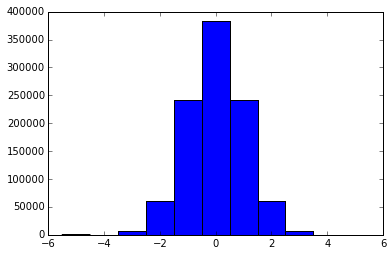

In [5]:
hist_norm = pyplot.hist(array, bins)
fig = pyplot.gcf


<h2> Binomial distribution

In [6]:
number_of_families = 1000000
random.seed(time.time())
trial_array = numpy.ndarray((number_of_families))
n_children_max = 0 
total = 0 

In [7]:
for i in range(0,number_of_families):
    n_sons = 0
    n_children = 0 
    while n_sons < 2:
        coin_flip = random.random()
        if coin_flip < 0.5:
            n_sons = n_sons + 1
        n_children = n_children + 1
    trial_array[i] = n_children
    total = total + n_children
    if n_children > n_children_max:
        n_children_max = n_children
    

3.999476


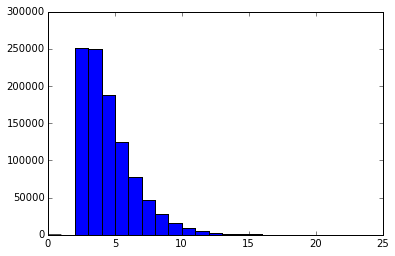

In [8]:
bins_ch = list(range(0,n_children_max+1))
hist_children = pyplot.hist(trial_array, bins_ch)
fig_ch = pyplot.gcf()

average = total / number_of_families
print(average)

In [9]:
def binomial_dist(p,n,k):
    P = math.factorial(n)/(math.factorial(k)*math.factorial(n-k))*(p)**k*(1-p)**(n-k)
    return P


In [10]:
p = 0.25
n = 4 

total = 0 
for k in range(0,n+1):
    P = binomial_dist(p, n, k)
    string = "k: " + str(k) + "\tP: " + str(P)
    print(string)
    total = total + P
    
print(total)

k: 0	P: 0.31640625
k: 1	P: 0.421875
k: 2	P: 0.2109375
k: 3	P: 0.046875
k: 4	P: 0.00390625
1.0


<h2> Fun with Poisson

In [11]:
def poisson_pdf(k, L):
    p = L**k*math.exp(-L)/math.factorial(k)
    return p

In [12]:
num_points = 10000000
average = 50 # lambda 
T = 10
dict_num_lists = dict()

i = 0 
while i < num_points: 
    t = numpy.random.rand()
    n = numpy.random.poisson(t*average)
    if n in dict_num_lists:
        dict_num_lists[n].append(t)
    else:
        dict_num_lists[n] = [t]
    i = i + 1
    

In [16]:
def find_prob_of_time(n):
    time_list = dict_num_lists[n]
    for time in time_list:
        print(time)
    

In [18]:
num_time_bins = 100
time_bins = [None]*(num_time_bins+1)
for i in range(0, num_time_bins+1):
    time_bins[i] = i/num_time_bins
    

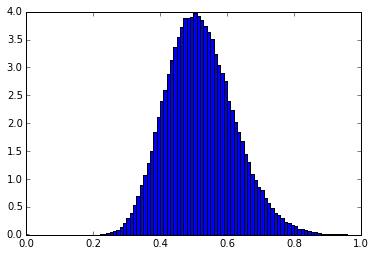

In [43]:
Nobs = 25
hist_times = pyplot.hist(dict_num_lists[Nobs], time_bins, normed=True)

In [57]:
Nmax = int(average*1.2)
plot_array = numpy.ndarray((Nmax))

for n in range(0, int(Nmax)):
    time_list = dict_num_lists.get(n, [])
    num_of_times = len(time_list)
    total_time = sum(time_list)
    expected_time = total_time / num_of_times
    plot_array[n] = expected_time

print(plot_array)

[ 0.0199868   0.03998588  0.05989905  0.07994219  0.09998663  0.11994175
  0.140068    0.16003884  0.18029164  0.20015231  0.21987434  0.24031589
  0.25975437  0.27979583  0.29976424  0.32006299  0.33972221  0.36001923
  0.38007283  0.39978621  0.42010299  0.44014082  0.45979308  0.47986176
  0.50054544  0.52013932  0.54033205  0.56016512  0.57948306  0.5997365
  0.61952883  0.63904301  0.6582862   0.67716633  0.69591298  0.71449946
  0.73241964  0.74870515  0.76626143  0.78201317  0.79644882  0.81048572
  0.82374891  0.83545508  0.84705091  0.85760299  0.86738573  0.87591805
  0.88403859  0.89146415  0.89814179  0.90443955  0.91019777  0.91560533
  0.91983776  0.92422639  0.92849908  0.93140516  0.9352155   0.93792875]


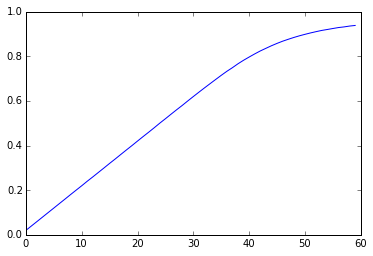

In [58]:
pyplot.plot(plot_array)

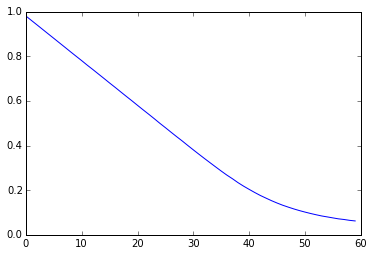

In [59]:
plot_array2 = 1. - plot_array
pyplot.plot(plot_array2)

<h2> Problem 2

In [92]:
num_points = 10000000
max_num = 15
num_num_lists = dict()

i = 0 
while i < num_points: 
    lam = numpy.random.rand() * max_num
    N = numpy.random.poisson(lam)
    M = numpy.random.poisson(lam)
    if N in num_num_lists:
        num_num_lists[N].append(M)
    else:
        num_num_lists[N] = [M]
    i = i + 1
    

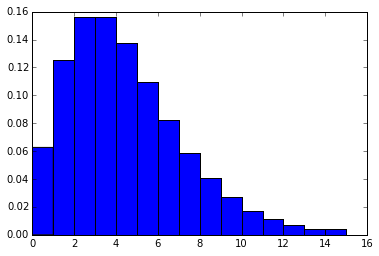

In [93]:
num_bins = range(0, max_num+1)
N_seen = 3
hist_nums = pyplot.hist(num_num_lists[N_seen], num_bins, normed=True)


In [75]:
print(num_num_lists[2])

[7]


In [44]:
timeit(numpy.random.poisson(average))
for i in range(0, num_time_bins+1):
        total_time = total_time + time_list[i]


The slowest run took 1668.84 times longer than the fastest. This could mean that an intermediate result is being cached 
1000000 loops, best of 3: 652 ns per loop
